In [1]:
import torch
import numpy as np
import pandas as pd

# playing with transformers

In [2]:
from transformers import GPT2Config, GPT2Tokenizer, AutoModelForCausalLM

config = GPT2Config() # config as in the paper
model = AutoModelForCausalLM.from_config(config)

In [ ]:
model

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2SdpaAttention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [3]:
tokenizer = GPT2Tokenizer.from_pretrained("openai-community/gpt2")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

In [4]:
prompt = "GPT2 is a model developed by OpenAI."

input_ids, attention_mask = tokenizer(prompt, return_tensors="pt").input_ids, tokenizer(prompt, return_tensors="pt").attention_mask
input_ids, attention_mask

(tensor([[   38, 11571,    17,   318,   257,  2746,  4166,   416,  4946, 20185,
             13]]),
 tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]))

In [5]:
model.generate(
    input_ids=input_ids,
    attention_mask=attention_mask,
    do_sample=True,
    temperature=0.9,
    max_length=100,
)

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


tensor([[   38, 11571,    17,   318,   257,  2746,  4166,   416,  4946, 20185,
            13, 47260, 45955, 27367, 17302, 23232, 10175, 41616, 20120, 33804,
         37041, 14306,  6139, 31547, 14190, 19327,  5246, 23880, 41900,  1168,
         10175, 35451, 31951, 27141, 29941, 12849, 46592, 39129, 14957, 15482,
         33642, 48653,  9439, 36529, 27566, 18539, 48653, 22963,  7678,  9745,
         14810,  7895, 42585, 12571,  7395, 29503, 32141, 48234,  1097, 50245,
         41292, 47493,  7678, 45540,  8158, 17425, 43594,  4838, 15223, 29738,
         20985, 42585,  8091, 31657, 37583, 31736, 32460, 44756, 27656, 31086,
         17425, 26569, 17377, 44425, 34059, 26381, 33151, 40371, 49417, 47429,
         35832, 19626, 46397, 10400, 19626, 30254, 30825, 39089, 41503,  8086]])

In [6]:
from transformers import AutoModelForCausalLM

model_trained = AutoModelForCausalLM.from_pretrained('gpt2')

model_trained.generate(
    input_ids=input_ids,
    attention_mask=attention_mask,
    do_sample=True,
    temperature=0.9,
    max_length=100,
)

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


tensor([[   38, 11571,    17,   318,   257,  2746,  4166,   416,  4946, 20185,
            13,   632,  3544,   257,  6087,   286, 31350,  3781,   286,   262,
           327,  4090,    52,   351,  1321,  7587,   832,   257,  6087,   286,
         11362,    11, 29369,  5631,    11,   290,  1877,  2866,    11, 10730,
         29964,   284,  1037, 27183,  1103,    12,  2435,  2854,   290,  6436,
           786,   262,  7587,   286,  1366,    13,   554,   511,  3348,    11,
           484,  4727,   477,   262,  1180,  7605,   329,   262,   327,  4090,
            52,   416,  4478,   326,   262,   327,  4090,    52,   815,   307,
         12380,  1973,  1111,  9135,    11, 13931,    11,   290,  3127,    13,
           198,   198,   818,   257, 43875,    11,   327,  4090,    52,   318]])

# load BabyLM

In [7]:
!pip install datasets
from datasets import load_dataset

babylm = load_dataset("vesteinn/babylm")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


README.md:   0%|          | 0.00/167 [00:00<?, ?B/s]

Repo card metadata block was not found. Setting CardData to empty.


train.txt:   0%|          | 0.00/533M [00:00<?, ?B/s]

train_10m.txt:   0%|          | 0.00/54.1M [00:00<?, ?B/s]

dev.txt:   0%|          | 0.00/51.5M [00:00<?, ?B/s]

test.txt:   0%|          | 0.00/56.5M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/11553291 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1016402 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1041942 [00:00<?, ? examples/s]

In [14]:
small_train = babylm['train'].select(range(256*256))
small_train[:300]

{'text': ['just like your book at home.',
  'do you want to look at that it says look?',
  'see.',
  "there's a face with glasses.",
  'aha.',
  "look there's pooh bear.",
  "there's a baby bear with his bottle.",
  "who's that?",
  'is that child.',
  'aha i think i see child.',
  'there he is.',
  'there he is.',
  'yeah yeah there he is.',
  'you see yourself.',
  "that's my pretty baby boy.",
  "i'm sorry that's handsome baby boy.",
  'you like that.',
  'yeah.',
  "look there's a bunny rabbit.",
  'see.',
  "there's kitty cat.",
  'oh.',
  'kitty cat.',
  "and who's this it's a baby.",
  "it's a baby.",
  'yeah.',
  'want to look at that.',
  'oh.',
  'does it fit your mouth.',
  "let's see what else there is in here.",
  "there's a.",
  'a pink pig.',
  'oink.',
  "you like that book it's very red.",
  "red is a good thing isn't it.",
  'oink.',
  'oink.',
  'oink.',
  'oink.',
  'oink.',
  'oink.',
  "you want your book back don't you.",
  "let's see do you want to see who this 

In [ ]:
small_train['text'][:10]

['just like your book at home.',
 'do you want to look at that it says look?',
 'see.',
 "there's a face with glasses.",
 'aha.',
 "look there's pooh bear.",
 "there's a baby bear with his bottle.",
 "who's that?",
 'is that child.',
 'aha i think i see child.']

In [ ]:
import random

random.seed(42)

sorted(tokenizer(small_train['text'][0])['input_ids'], key=lambda x: random.random())

[588, 1492, 534, 3137, 1363, 379, 13]

In [ ]:
from transformers import AutoTokenizer, DataCollatorForLanguageModeling
from torch.utils.data import DataLoader

tokenizer.pad_token = tokenizer.eos_token

# Tokenize dataset
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=32)

# Apply the tokenizer to the dataset
tokenized_babylm = small_train.map(tokenize_function, batched=True, remove_columns=["text"])

# Create a DataCollator for padding and formatting for causal language modeling
data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)

# Set up DataLoader
train_dataloader = DataLoader(
    tokenized_babylm,
    batch_size=256,
    shuffle=True,
    collate_fn=data_collator
)

Map:   0%|          | 0/65536 [00:00<?, ? examples/s]

In [ ]:
from transformers import AutoTokenizer, DataCollatorForLanguageModeling
from torch.utils.data import DataLoader

tokenizer.pad_token = tokenizer.eos_token

# Tokenize dataset
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=32)

# Apply the tokenizer to the dataset
tokenized_babylm = babylm['train'].select(range(100000)).map(tokenize_function, batched=True, remove_columns=["text"])

# Create a DataCollator for padding and formatting for causal language modeling
data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)

# Set up DataLoader
train_dataloader = DataLoader(
    tokenized_babylm,
    batch_size=256,
    shuffle=True,
    collate_fn=data_collator
)

Map:   0%|          | 0/1000000 [00:00<?, ? examples/s]

In [ ]:
def shuffle_and_tokenize(example):
    # Tokenize the text into tokens
    tokens = tokenizer.tokenize(example["text"])

    # Shuffle the tokens
    random.shuffle(tokens)

    # Convert shuffled tokens back to text
    shuffled_text = tokenizer.convert_tokens_to_string(tokens)

    # Retokenize the shuffled text to get input IDs
    tokenized_output = tokenizer(shuffled_text, padding="max_length", truncation=True, max_length=32)

    return tokenized_output

# Apply the function to the dataset
shuffled_babylm = small_train.map(shuffle_and_tokenize, batched=False, remove_columns=["text"])

# Create a DataCollator for padding and formatting for causal language modeling
data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)

# Set up DataLoader
train_dataloader_shuffled = DataLoader(
    shuffled_babylm,
    batch_size=256,
    shuffle=True,
    collate_fn=data_collator
)

Map:   0%|          | 0/65536 [00:00<?, ? examples/s]

In [ ]:
next(iter(train_dataloader_shuffled))

{'input_ids': tensor([[ 1183,    13,   732,  ..., 50256, 50256, 50256],
        [  683,  1263,  9245,  ..., 50256, 50256, 50256],
        [ 5156,    13,  2188,  ..., 50256, 50256, 50256],
        ...,
        [   67,    13,   340,  ..., 50256, 50256, 50256],
        [33847,    13, 16390,  ..., 50256, 50256, 50256],
        [  644, 20342,   338,  ..., 50256, 50256, 50256]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'labels': tensor([[ 1183,    13,   732,  ...,  -100,  -100,  -100],
        [  683,  1263,  9245,  ...,  -100,  -100,  -100],
        [ 5156,    13,  2188,  ...,  -100,  -100,  -100],
        ...,
        [   67,    13,   340,  ...,  -100,  -100,  -100],
        [33847,    13, 16390,  ...,  -100,  -100,  -100],
        [  644, 20342,   338,  ...,  -100,  -100,  -100]])}

# train

In [ ]:
import torch
from transformers import AdamW
from tqdm import tqdm  # for progress bar

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

optimizer = AdamW(model.parameters(), lr=5e-5)

num_epochs = 10
losses = []
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    model.train()

    for batch in tqdm(train_dataloader):
        batch = {k: v.to(device) for k, v in batch.items()}

        outputs = model(**batch)
        loss = outputs.loss

        loss.backward()

        optimizer.step()
        optimizer.zero_grad()
        losses.append(loss.item())
    print(f"Loss: {sum(losses[-len(train_dataloader):]) / len(train_dataloader)}")

print("Training complete!")

Epoch 1/10


  0%|          | 12/3907 [00:05<30:58,  2.10it/s]


KeyboardInterrupt: 

# evals?

<Axes: title={'center': 'perplexity over training'}, xlabel='batch num', ylabel='perplexity'>

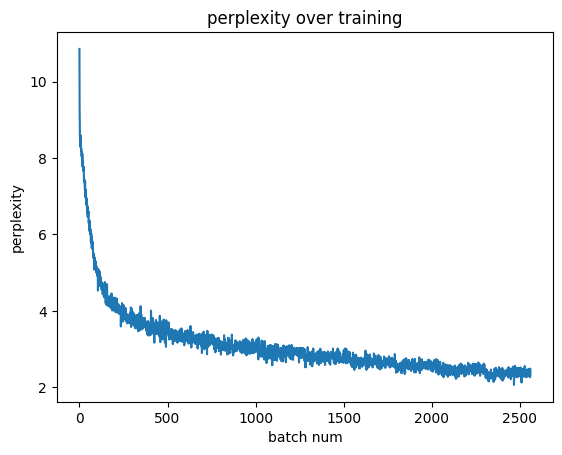

In [ ]:
pd.Series(losses).plot(title='perplexity over training', xlabel='batch num', ylabel='perplexity')

In [ ]:
prompt = ""

input_ids, attention_mask = tokenizer(prompt, return_tensors="pt").input_ids.to(device), tokenizer(prompt, return_tensors="pt").attention_mask.to(device)

outputs = model.generate(
    input_ids=input_ids,
    attention_mask=attention_mask,
    do_sample=True,
    temperature=0.9,
    max_length=100,
)

tokenizer.batch_decode(outputs)[0]

NameError: name 'device' is not defined

In [ ]:
small_val = babylm['validation'].select(range(32*256))

# Apply the tokenizer to the dataset
tokenized_babylm_val = small_val.map(tokenize_function, batched=True, remove_columns=["text"])

# Set up DataLoader
val_dataloader = DataLoader(
    tokenized_babylm_val,
    batch_size=256,
    shuffle=True,
    collate_fn=data_collator
)

Map:   0%|          | 0/8192 [00:00<?, ? examples/s]

In [ ]:
model.eval()

val_losses= []

for batch in tqdm(val_dataloader):
    batch = {k: v.to(device) for k, v in batch.items()}

    with torch.no_grad():
        outputs = model(**batch)
        loss = outputs.loss
        val_losses.append(loss.item())

pd.Series(val_losses).mean()

100%|██████████| 32/32 [00:05<00:00,  6.26it/s]


4.567511200904846

# OSV learning

In [ ]:
!pip install stanza
import stanza

stanza.download('en')
nlp = stanza.Pipeline('en')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 50.0 MB/s eta 0:00:00


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: en (English) ...


INFO:stanza:Downloaded file to /root/stanza_resources/en/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
/usr/local/lib/python3.10/dist-packages/stanza/models/tokenization/trainer.py:82: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pyto

In [ ]:
class Node:

    def __init__(self, sentence_id, text, deprel, upos, parent=None):
        self.parent = parent
        self.text = text
        self.deprel = deprel
        self.upos = upos
        self.children = {}
        self.sentence_id = sentence_id

    def addChild(self, child):
        self.children[child.deprel] = child
        child.parent = self

    def getNodes(self):
        if not self.children:
            return {self}
        output = set()
        output.add(self)
        for child in self.children.values():
            output = output.union(child.getNodes())
        return output

    def __str__(self):
        nodes = self.getNodes()
        idWords = [(node.sentence_id, node.text) for node in nodes]
        idWords.sort()
        output = ""
        for sentence_id, text in idWords:
            output = output + " " + text
        output = output[1:]
        return output


def constructTree(sentence):
    id_to_node = {}
    for word in sentence.words:
        node = Node(word.id, word.text, word.deprel, word.upos)
        id_to_node[word.id] = node
    root = None
    for word in sentence.words:
        node = id_to_node[word.id]
        parent_id = word.head
        if parent_id == 0:
            root = node
            continue
        parent_node = id_to_node[parent_id]
        parent_node.addChild(node)
    return root

def permuteTree(tree, order):
    #order example: {'S': 1, 'V': 3, 'O':2}
    #classic SVO: nsubj, root, obj
    #nsubj, cop, root
    #swap SVO, leave everything else where it is
    segments = {}
    segments[tree.sentence_id] = tree.text

    swap_ids = set() #ids to permute
    swap_rank_to_segment = {}

    if tree.upos == "VERB":
        swap_rank_to_segment[order['V']] = tree.text

        swap_ids.add(tree.sentence_id)
    else:
        swap_rank_to_segment[order['O']] = tree.text
        swap_ids.add(tree.sentence_id)

    for child in tree.children.values():
        segment = str(child)
        segments[child.sentence_id] = segment

        if "nsubj" in child.deprel:
            swap_rank_to_segment[order['S']] = segment
            swap_ids.add(child.sentence_id)

        if tree.upos == "VERB":
            if child.deprel == "obj":
                swap_rank_to_segment[order['O']] = segment
                swap_ids.add(child.sentence_id)
        elif child.deprel == "cop":
            swap_rank_to_segment[order['V']] = segment
            swap_ids.add(child.sentence_id)

    sorted_segments = list(segments.items())
    sorted_segments.sort()

    next_swap_rank_to_add = 1
    output = ""
    for sentence_id, segment in sorted_segments:
        if sentence_id not in swap_ids:
            output = output + segment + " "
            continue
        while next_swap_rank_to_add not in swap_rank_to_segment and next_swap_rank_to_add < 3:
            next_swap_rank_to_add += 1
        if next_swap_rank_to_add > 3:
            continue
        output = output + swap_rank_to_segment[next_swap_rank_to_add] + " "
        next_swap_rank_to_add += 1
    output = output[:-1]
    return output

In [ ]:
def permuteSentence(sentence, order):
    doc = nlp(sentence)
    if len(doc.sentences) == 0:
        return sentence
    tree = constructTree(doc.sentences[0])
    return permuteTree(tree, order)

def datasetPermute(elt,order):
    elt['text'] = permuteSentence(elt['text'],order)
    return elt

In [ ]:
datasets = {'train': small_train, 'val': small_val}

In [ ]:
new_datasets = {}
for dataset_name, dataset in datasets.items():
    new_dataset = dataset.map(lambda elt: datasetPermute(elt,{'S': 2, 'V': 3, 'O':1}))
    new_datasets[dataset_name] = new_dataset

Map:   0%|          | 0/65536 [00:00<?, ? examples/s]

Map:   0%|          | 0/8192 [00:00<?, ? examples/s]

In [ ]:
tokenized_new = {}

for dataset_name, dataset in new_datasets.items():
  tokenized_new[dataset_name] = dataset.map(tokenize_function, batched=True, remove_columns=["text"])

# Set up DataLoader

train_dataloader_osv = DataLoader(
    tokenized_new['train'],
    batch_size=256,
    shuffle=True,
    collate_fn=data_collator
)

# Set up DataLoader
val_dataloader_osv = DataLoader(
    tokenized_new['val'],
    batch_size=256,
    shuffle=True,
    collate_fn=data_collator
)

Map:   0%|          | 0/65536 [00:00<?, ? examples/s]

Map:   0%|          | 0/8192 [00:00<?, ? examples/s]

In [ ]:
model_osv = AutoModelForCausalLM.from_config(config)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_osv.to(device)

optimizer = AdamW(model_osv.parameters(), lr=5e-5)

num_epochs = 10
losses_osv = []
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    model_osv.train()

    for batch in tqdm(train_dataloader_osv):
        batch = {k: v.to(device) for k, v in batch.items()}

        outputs = model_osv(**batch)
        loss = outputs.loss

        loss.backward()

        optimizer.step()
        optimizer.zero_grad()
        losses_osv.append(loss.item())
    print(f"Loss: {sum(losses_osv[-len(train_dataloader):]) / len(train_dataloader)}")

print("Training complete!")

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/10


100%|██████████| 256/256 [01:53<00:00,  2.25it/s]


Loss: 5.05788447894156
Epoch 2/10


100%|██████████| 256/256 [01:53<00:00,  2.25it/s]


Loss: 3.510005201213062
Epoch 3/10


100%|██████████| 256/256 [01:53<00:00,  2.25it/s]


Loss: 3.185240350663662
Epoch 4/10


100%|██████████| 256/256 [01:53<00:00,  2.25it/s]


Loss: 2.9776844922453165
Epoch 5/10


100%|██████████| 256/256 [01:53<00:00,  2.25it/s]


Loss: 2.8260208182036877
Epoch 6/10


100%|██████████| 256/256 [01:53<00:00,  2.25it/s]


Loss: 2.6960534527897835
Epoch 7/10


100%|██████████| 256/256 [01:53<00:00,  2.25it/s]


Loss: 2.5822648713365197
Epoch 8/10


100%|██████████| 256/256 [01:53<00:00,  2.25it/s]


Loss: 2.474427376873791
Epoch 9/10


100%|██████████| 256/256 [01:53<00:00,  2.25it/s]


Loss: 2.376405759714544
Epoch 10/10


100%|██████████| 256/256 [01:53<00:00,  2.25it/s]

Loss: 2.276855061762035
Training complete!


<Axes: title={'center': 'perplexity over training'}, xlabel='batch num', ylabel='perplexity'>

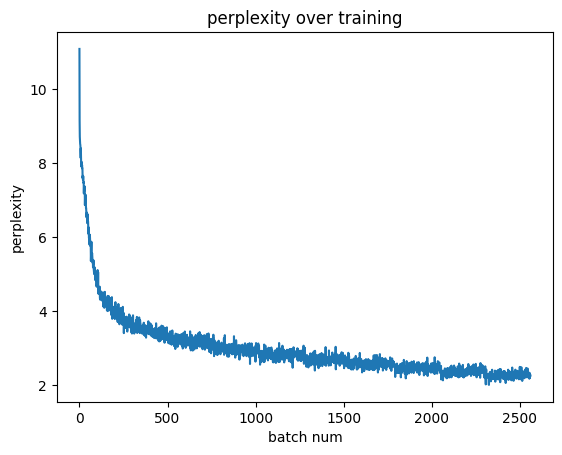

In [ ]:
pd.Series(losses_osv).plot(title='perplexity over training', xlabel='batch num', ylabel='perplexity')

In [ ]:
import matplotlib.pyplot as plt

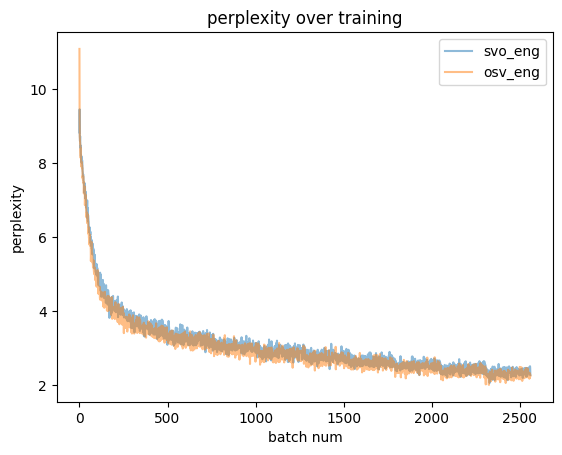

In [ ]:
pd.Series(losses).plot(title='perplexity over training', xlabel='batch num', ylabel='perplexity', alpha=0.5, label="svo_eng")
pd.Series(losses_osv).plot(title='perplexity over training', xlabel='batch num', ylabel='perplexity', alpha=0.5, label="osv_eng")
plt.legend()

In [ ]:
model_osv.eval()

val_losses_osv = []

for batch in tqdm(val_dataloader_osv):
    batch = {k: v.to(device) for k, v in batch.items()}

    with torch.no_grad():
        outputs = model_osv(**batch)
        loss = outputs.loss
        val_losses_osv.append(loss.item())

pd.Series(val_losses_osv).mean()

100%|██████████| 32/32 [00:05<00:00,  6.25it/s]


4.393186613917351

In [ ]:
prompt = "do you want"

input_ids, attention_mask = tokenizer(prompt, return_tensors="pt").input_ids.to(device), tokenizer(prompt, return_tensors="pt").attention_mask.to(device)

outputs = model_osv.generate(
    input_ids=input_ids,
    attention_mask=attention_mask,
    do_sample=True,
    temperature=0.9,
    max_length=100,
)

tokenizer.batch_decode(outputs)[0]

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


"do you want to see the book ? ? the book ? ?ig ? ethan ? . haha ? more . you want a doggie ? okay you want .ryattle they ! daddy look at .ah . doggie . we can a sheep a big bird a dog . yayons a hat ? you wan 's that 's with aha doggie okay 's aha right there there ?iguckigg baby 's right at aha your monkey 's right there"

In [ ]:
prompt = "do you want"

input_ids, attention_mask = tokenizer(prompt, return_tensors="pt").input_ids.to(device), tokenizer(prompt, return_tensors="pt").attention_mask.to(device)

outputs = model.generate(
    input_ids=input_ids,
    attention_mask=attention_mask,
    do_sample=True,
    temperature=0.9,
    max_length=100,
)

tokenizer.batch_decode(outputs)[0]

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


'do you want a spoon??????? catherine??? back up and you like that doller to sit is going?woo?? big bird?? on the hat??itties?.ittieichael?.oo.kittie catog.room?aboo!f?up saysow!oomamoo?ogoo?awoo?icky.oo.ewoo??aboomoo.oo?ittie mm.w'

# shuffled

In [ ]:
import torch
from transformers import AdamW
from tqdm import tqdm  # for progress bar

model_shuffled = AutoModelForCausalLM.from_config(config)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_shuffled.to(device)

optimizer = AdamW(model_shuffled.parameters(), lr=5e-5)

num_epochs = 10
losses_shuffled = []
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    model_shuffled.train()

    for batch in tqdm(train_dataloader_shuffled):
        batch = {k: v.to(device) for k, v in batch.items()}

        outputs = model_shuffled(**batch)
        loss = outputs.loss

        loss.backward()

        optimizer.step()
        optimizer.zero_grad()
        losses_shuffled.append(loss.item())
    print(f"Loss: {sum(losses_shuffled[-len(train_dataloader_shuffled):]) / len(train_dataloader_shuffled)}")

print("Training complete!")

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/10


100%|██████████| 256/256 [01:54<00:00,  2.23it/s]


Loss: 6.3221756257116795
Epoch 2/10


100%|██████████| 256/256 [01:53<00:00,  2.25it/s]


Loss: 5.072144901379943
Epoch 3/10


100%|██████████| 256/256 [01:53<00:00,  2.25it/s]


Loss: 4.759231571108103
Epoch 4/10


100%|██████████| 256/256 [01:53<00:00,  2.25it/s]


Loss: 4.5499191880226135
Epoch 5/10


100%|██████████| 256/256 [01:53<00:00,  2.25it/s]


Loss: 4.3840649370104074
Epoch 6/10


100%|██████████| 256/256 [01:53<00:00,  2.25it/s]


Loss: 4.244890353642404
Epoch 7/10


100%|██████████| 256/256 [01:53<00:00,  2.25it/s]


Loss: 4.114390169270337
Epoch 8/10


100%|██████████| 256/256 [01:53<00:00,  2.25it/s]


Loss: 3.993649560958147
Epoch 9/10


100%|██████████| 256/256 [01:53<00:00,  2.25it/s]


Loss: 3.8714701691642404
Epoch 10/10


100%|██████████| 256/256 [01:53<00:00,  2.25it/s]

Loss: 3.748629511334002
Training complete!


<Axes: title={'center': 'perplexity over training'}, xlabel='batch num', ylabel='perplexity'>

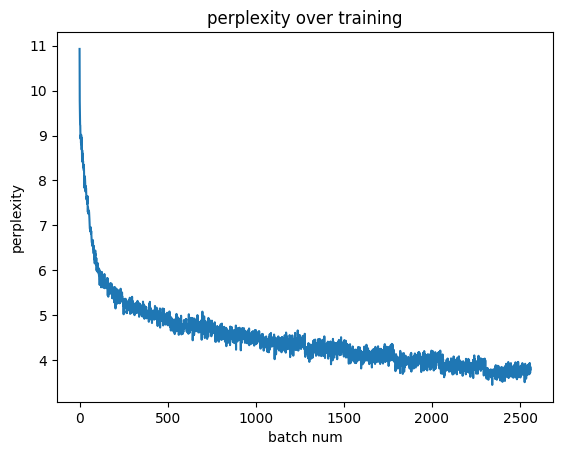

In [ ]:
pd.Series(losses_shuffled).plot(title='perplexity over training', xlabel='batch num', ylabel='perplexity')

In [ ]:
prompt = "i"

input_ids, attention_mask = tokenizer(prompt, return_tensors="pt").input_ids.to(device), tokenizer(prompt, return_tensors="pt").attention_mask.to(device)

outputs = model_shuffled.generate(
    input_ids=input_ids,
    attention_mask=attention_mask,
    do_sample=True,
    temperature=0.9,
    max_length=100,
)

tokenizer.batch_decode(outputs)[0]

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


"i here go. see the'll let one in's see let else in here's see if let see can here with see's what we what else we in you what is box it there something one and play'slet else's here box see in's see box here. want in here in.here's's is in here what box see is else.' box in else seeoh is boxoh in the what else wanna golet box else else have see's what in want herelet see's"

In [3]:
### CHANGE TO THE FILEPATH OF THE NLP PROJECT FOLDER
NLP_folder = '/content/drive/MyDrive/NLP Project'
n_datapoints = 1000000
possible_orders = ['original', 'reversed', 'random', 'ordered_sov', 'ordered_svo', 'ordered_osv', 'ordered_ovs', 'ordered_vso', 'ordered_vos']
# orders_to_run = possible_orders
orders_to_run = ['ordered_vso', 'final', 'initial']
#, 'random', 'ordered_sov', 'ordered_svo', 'ordered_osv', ]
# orders_to_run = ['ordered_sov', 'ordered_svo']

num_epochs = 2

In [4]:
import torch
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

!pip install datasets
from datasets import load_dataset, Dataset

import sys
sys.path.append(NLP_folder)
import data_processing_utils

# Load the JSON file
file_names = {
    'val': f'{NLP_folder}/datasets/{n_datapoints}/validation_data_{n_datapoints}',
    'test': f'{NLP_folder}/datasets/{n_datapoints}/testing_data_{n_datapoints}'
}
val_data = data_processing_utils.load_from_json_file(file_names['val'])
test_data = data_processing_utils.load_from_json_file(file_names['test'])

# Define the six possible sentence structures
orders = ['vso', 'final', 'initial']

# Datasets for all eight hypotheses
datasets = {
  'ordered_vso': {'train': None, 'val': None, 'test': None},
  'final': {'train': None, 'val': None, 'test': None},
  'initial': {'train': None, 'val': None, 'test': None},
}

# Populate ordered datasets for the specified orders
for order in orders:
    if order == 'vso':
      datasets[f'ordered_{order}']['val'] = data_processing_utils.get_ordered_strings(val_data, order=order)
      datasets[f'ordered_{order}']['test'] = data_processing_utils.get_ordered_strings(test_data, order=order)

datasets['final']['val'] = data_processing_utils.get_head_final_strings(val_data)
datasets['final']['test'] = data_processing_utils.get_head_final_strings(test_data)

datasets['initial']['val'] = data_processing_utils.get_head_initial_strings(val_data)
datasets['initial']['test'] = data_processing_utils.get_head_initial_strings(test_data)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
def generate_output(prompt, model, tokenizer, in_words = True):
    """
    Puts prompt into model using tokenizer and then generates the output
    If in_words, then converts back to words using tokenizer
    """
    if prompt is None:
        prompt = tokenizer.eos_token
    input_ids, attention_mask = tokenizer(prompt, return_tensors="pt").input_ids, tokenizer(prompt, return_tensors="pt").attention_mask
    input_ids, attention_mask = input_ids.to(device), attention_mask.to(device)
    output = model.generate(
        input_ids=input_ids,
        attention_mask=attention_mask,
        do_sample=True,
        temperature=0.9,
        max_length=100,
    )
    if in_words:
        return tokenizer.batch_decode(output)[0]
    else:
        return output

import torch
from datasets import Dataset
from torch.utils.data import DataLoader
from transformers import DataCollatorForLanguageModeling, GPT2Tokenizer

# Initialize tokenizer and set pad token
tokenizer = GPT2Tokenizer.from_pretrained("openai-community/gpt2")
tokenizer.pad_token = tokenizer.eos_token

# Detect device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


# Define a function to create DataLoader for a given dataset
def create_dataloader(dataset_strings, tokenizer, device, batch_size=256, max_length=32, shuffle=True):
    # Tokenize the dataset
    tokenized_data = tokenizer(
        dataset_strings,
        padding="max_length",
        truncation=True,
        max_length=max_length,
        return_tensors="pt"
    )

    # Move tokenized data to device
    tokenized_data = {key: value.to(device) for key, value in tokenized_data.items()}

    # Convert to Dataset
    tokenized_dataset = Dataset.from_dict({key: value.cpu().numpy().tolist() for key, value in tokenized_data.items()})

    # Create DataCollator
    data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)

    # Create DataLoader
    dataloader = DataLoader(
        tokenized_dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        collate_fn=data_collator
    )

    return dataloader

# Create DataLoaders for all datasets
dataloaders = {
    dataset_type: {
        split: create_dataloader(datasets[dataset_type][split], tokenizer, device)
        for split in ['val', 'test']
    }
    for dataset_type in datasets.keys()
}

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Using device: cuda


KeyError: 'train'

In [11]:
import torch
from transformers import AdamW
from tqdm import tqdm  # for progress bar
import matplotlib.pyplot as plt
from transformers import GPT2Config, GPT2Tokenizer, AutoModelForCausalLM
import json

for dataset_type in orders_to_run:
    print(f"Evaluate model on {dataset_type} dataset")

    save_directory = f"{NLP_folder}/trained_model_{dataset_type}_{n_datapoints}_{num_epochs}"

    model = AutoModelForCausalLM.from_pretrained(save_directory)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    # Set model to evaluation mode
    model.eval()

    val_losses = []

    for batch in tqdm(dataloaders[dataset_type]['val']):
        batch = {k: v.to(device) for k, v in batch.items()}

        with torch.no_grad():
            outputs = model(**batch)
            loss = outputs.loss
            val_losses.append(loss.item())

    print(f"Average validation loss: {pd.Series(val_losses).mean()}")

    # Save the validation losses
    val_losses_file = f"{save_directory}/validation_losses.json"
    with open(val_losses_file, "w") as f:
        json.dump(val_losses, f)
    print(f"Validation losses saved to {val_losses_file}")

"""
    print("Evaluate model on test dataset")

    # Calculate test losses
    test_losses = []

    for batch in tqdm(dataloaders[dataset_type]['test']):
        batch = {k: v.to(device) for k, v in batch.items()}

        with torch.no_grad():
            outputs = model(**batch)
            loss = outputs.loss
            test_losses.append(loss.item())
    print(f"Average test loss: {pd.Series(test_losses).mean()}")

    # Save the test losses
    test_losses_file = f"{save_directory}/test_losses.json"
    with open(test_losses_file, "w") as f:
        json.dump(test_losses, f)
    print(f"Test losses saved to {test_losses_file}")
"""

Evaluate model on ordered_vso dataset


100%|██████████| 4290/4290 [11:12<00:00,  6.38it/s]


Average validation loss: 4.547580130561526
Validation losses saved to /content/drive/MyDrive/NLP Project/trained_model_ordered_vso_1000000_2/validation_losses.json
Evaluate model on final dataset


100%|██████████| 4290/4290 [11:13<00:00,  6.37it/s]


Average validation loss: 4.656011751148251
Validation losses saved to /content/drive/MyDrive/NLP Project/trained_model_final_1000000_2/validation_losses.json
Evaluate model on initial dataset


100%|██████████| 4290/4290 [11:13<00:00,  6.37it/s]

Average validation loss: 4.448893821156108
Validation losses saved to /content/drive/MyDrive/NLP Project/trained_model_initial_1000000_2/validation_losses.json


'\n    print("Evaluate model on test dataset")\n\n    # Calculate test losses\n    test_losses = []\n\n    for batch in tqdm(dataloaders[dataset_type][\'test\']):\n        batch = {k: v.to(device) for k, v in batch.items()}\n\n        with torch.no_grad():\n            outputs = model(**batch)\n            loss = outputs.loss\n            test_losses.append(loss.item())\n    print(f"Average test loss: {pd.Series(test_losses).mean()}")\n\n    # Save the test losses\n    test_losses_file = f"{save_directory}/test_losses.json"\n    with open(test_losses_file, "w") as f:\n        json.dump(test_losses, f)\n    print(f"Test losses saved to {test_losses_file}")\n'